In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv('./global_heat_index.csv')

In [3]:
data.head()

,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
0,2011,1,1,0,8,13.522659,986.761841,72.295858,37.288387,3.011042,0
1,2011,1,1,1,8,12.835814,986.441406,75.376186,37.686718,3.091243,0
2,2011,1,1,2,8,12.198058,985.736511,78.405198,35.053905,3.007649,0
3,2011,1,1,3,8,11.583500,985.525696,81.042980,30.135216,2.926715,0
4,2011,1,1,4,8,11.029578,985.661926,82.548508,24.402969,2.915177,0


In [4]:
c1= data[data['Hour'] <6]
c2 = data[ data['Hour'] > 18]

In [5]:
data.drop(c1.index, inplace = True)
data.drop(c2.index, inplace = True)

In [6]:
data.head()

,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
6,2011,1,1,6,2,7.806705,986.249146,67.093181,95.835983,1.815175,0
7,2011,1,1,7,2,9.036408,987.038940,64.035483,105.198181,1.615310,0
8,2011,1,1,8,3,12.158280,987.897400,55.105656,113.317665,1.439088,159
9,2011,1,1,9,3,14.965301,988.211914,47.166938,117.327606,1.063374,363
10,2011,1,1,10,3,18.956082,988.054504,36.747087,72.488327,0.545695,533


In [7]:
x = data.iloc[:,4:10].values
y = data.iloc[:,-1].values

In [8]:
y =y.reshape(-1,1)

In [9]:
y

array([[  0],
       [  0],
       [159],
       ...,
       [221],
       [ 16],
       [  0]], dtype=int64)

In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [11]:
print(x_train)

[[ 23.          28.95276574 974.4337769   72.00650744 230.5746765
    3.48527336]
 [  7.          31.45725588 982.7936401   21.82772614  43.92575455
    1.79098237]
 [  5.          45.90862693 977.0198364    9.19367135 256.100769
    2.31313491]
 ...
 [  1.          17.1015701  988.6531982   34.68437781   9.09429932
    1.42941236]
 [ 24.          25.72412262 975.875       95.01792758 211.7336121
    2.95700026]
 [ 25.          28.49819406 974.4430542   83.5370614  239.0466156
    2.56590128]]


In [12]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)

y_train = sc.fit_transform(y_train)



In [13]:
print(x_train)

[[ 1.05968611 -0.10596836 -0.86953246  1.20221031  0.39135863  0.85990992]
 [-0.37392147  0.19583916  0.47710333 -0.76144896 -1.50792046 -0.50344039]
 [-0.55312242  1.93732438 -0.45296102 -1.2558607   0.65110389 -0.08327831]
 ...
 [-0.91152432 -1.53411535  1.4209813  -0.25832627 -1.86235409 -0.79438603]
 [ 1.14928659 -0.49504108 -0.63737524  2.10272218  0.19963805  0.43482279]
 [ 1.23888706 -0.16074724 -0.86803804  1.65343846  0.47756634  0.12011598]]


### `Kmeans Clustering with 6 clusters`

In [14]:
from sklearn.cluster import KMeans

clus = KMeans(n_clusters = 6, random_state = 0)

clus.fit(x_train,y_train)


c:\Users\Satyam\Desktop\Data_Science\satyam\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=6, random_state=0)

In [15]:
labels = clus.labels_
cluster_center = clus.cluster_centers_

print("Labels : " , labels)
print("Cluster Center : " , cluster_center)

Labels :  [2 0 1 ... 3 2 2]
Cluster Center :  [[-0.61067852 -0.22953897  0.85296425 -0.56900073 -1.34754782 -0.69944564]
 [-1.06683181  0.69953201  0.04271687 -1.16744214  0.83124334  0.01402357]
 [ 1.18732212  0.07003915 -0.93122377  1.27431066  0.25433125 -0.09787964]
 [-0.65151081 -1.64656972  1.18139577  0.26109687 -1.09473473 -0.02650561]
 [ 0.14674628 -0.38089807  0.65185994  0.19276176  0.69268634 -0.79074361]
 [ 0.40401817  1.04788338 -1.07514525 -0.40467305  0.50974261  1.49618357]]


In [16]:
from sklearn.decomposition import PCA

# Example data
# x_train = ... (your training data)

pca = PCA(n_components=2)
x_train_transformed = pca.fit_transform(x_train)

# Print the shape of the transformed data
print(x_train_transformed.shape[0])

7592


In [17]:
len(labels)

7592

In [18]:
x_train_transformed.shape[0]

7592

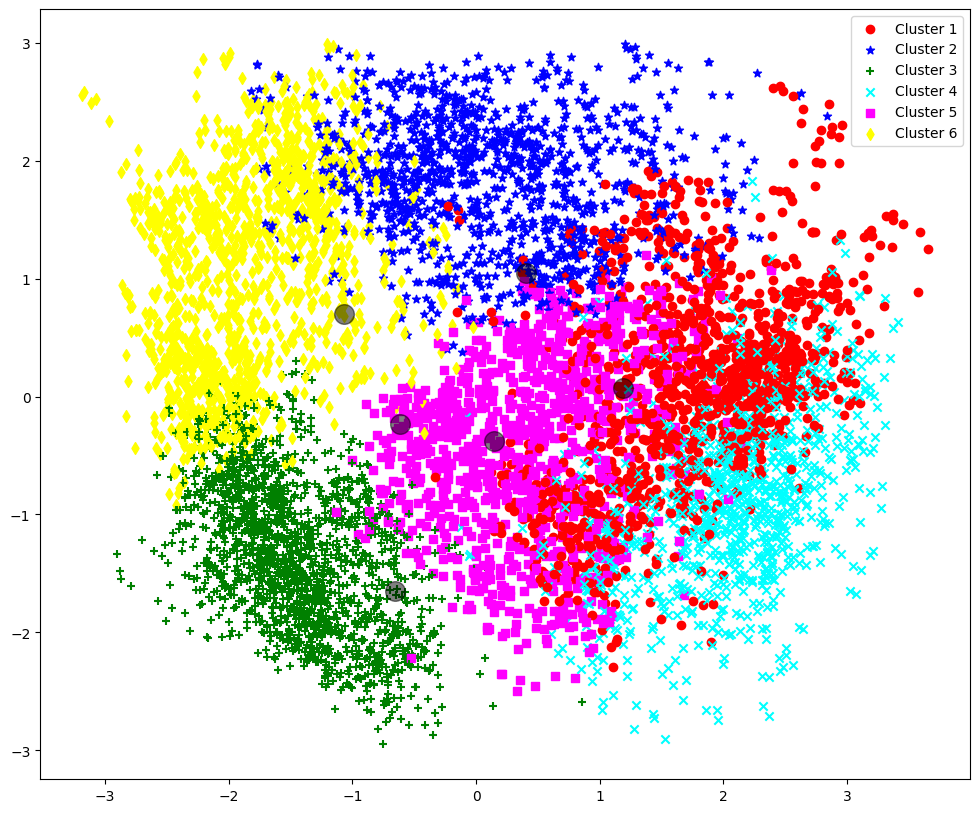

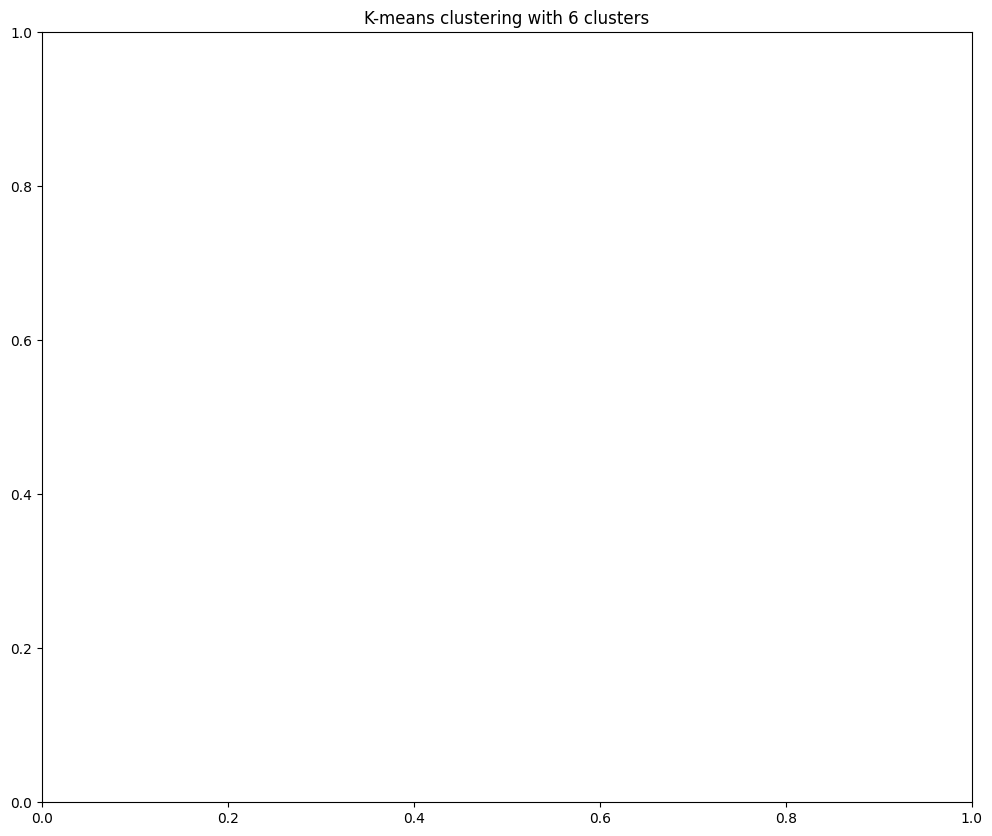

In [21]:
for i in range(x_train_transformed.shape[0]):
    if labels[i] == 0:
        c1 = plt.scatter(x_train_transformed[i, 0], x_train_transformed[i, 1], color='red' , marker = 'o')
    elif labels[i] == 1:
        c2 = plt.scatter(x_train_transformed[i, 0], x_train_transformed[i, 1], color='blue' , marker = '*')
    elif labels[i] == 2:
        c3 = plt.scatter(x_train_transformed[i, 0], x_train_transformed[i, 1], color='green' , marker = '+')
    elif labels[i] == 3:
        c4 = plt.scatter(x_train_transformed[i, 0], x_train_transformed[i, 1], color='cyan'  , marker = 'x')
    elif labels[i] == 4:
        c5 = plt.scatter(x_train_transformed[i, 0], x_train_transformed[i, 1], color='magenta' , marker = 's')
    elif labels[i] == 5:
        c6 = plt.scatter(x_train_transformed[i, 0], x_train_transformed[i, 1], color='yellow' , marker = 'd')


plt.scatter(cluster_center[:, 0], cluster_center[:, 1], color='black', s=200, alpha=0.5)

plt.rcParams["figure.figsize"] = (12, 10)
plt.legend([c1, c2, c3, c4, c5, c6], ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 6'])    
plt.figure(figsize=(12,10))
plt.title('K-means clustering with 6 clusters')
plt.show()